# Week 3: linear regression

In this assignment, we will use data from Mashable (www.mashable.com). Mashable is an online magazine that focuses on producing viral content. You may wonder: what makes an article go viral? That’s what you will be trying to find out

*Objective* : Build a linear regression model to predict the log number of shares an article received

# Linear Regression

Linear regression is a linear approach to modelling the relationship between a scalar response and one or more explanatory variables, also known as dependent and independent variables. The depended variables is depended on the in-depended variable. The in-depended variable  causes the change for the depended variable. 
 
*Formula for Linear Regression* :  $Y = b0 + b1*X + e $ <br>

Y = depended variable <br>
X = independed variable<br>

b0 = intercept <br>
b1 = slope <br>

e = error or residual<br>

# Data pre-processing steps

In the data pre-processing steps the needed libraries are included and the consulted data-file is included in a dataframe. 

In [18]:
import seaborn as sns
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import math

from sklearn.linear_model import LinearRegression #remember, this is linear regression model from sk-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

df = pd.read_csv("data Mashable.csv", engine='python') 
df.head() # this shows the head of the dataframe in the output

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
0,1,http://mashable.com/2013/10/29/ashton-kutcher-...,10,821,12,0,4.518879,0,0,0,...,0,0,0,0,0.439379,0.082486,0.666667,0.375,2100,3.322219
1,2,http://mashable.com/2014/09/08/mashies-sept-19...,9,489,6,0,5.040900,0,0,0,...,0,0,0,0,0.300454,0.027715,0.000000,0.000,274,2.437751
2,3,http://mashable.com/2013/02/01/hello-kitty-roc...,11,131,0,1,4.877863,0,0,0,...,1,0,0,0,0.575486,0.259120,0.000000,0.000,1500,3.176091
3,4,http://mashable.com/2014/02/06/add-us-on-snapc...,8,556,2,0,4.974820,0,0,1,...,0,0,0,0,0.327220,0.134424,0.000000,0.000,2000,3.301030
4,5,http://mashable.com/2014/01/07/lindsey-vonn-wi...,9,880,18,0,4.928409,0,0,0,...,0,0,0,0,0.507709,0.109256,0.000000,0.000,6000,3.778151


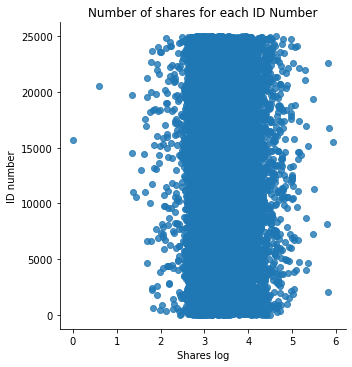

In [19]:
sns.lmplot(x='shares_log', y='id', fit_reg=False, data=df)
plt.xlabel("Shares log") 
plt.ylabel("ID number")
plt.title("Number of shares for each ID Number")
plt.show()

## Create Sub dataframe

Create the sub dataframe that contains the needed variables for this linear regression model.

In [20]:
df_sub = df[["n_tokens_content", "num_imgs", "num_videos", "is_weekend", "data_channel_is_socmed"]]

df_y = df['shares_log'] #We need to take out the rating as our Y-variable
df_x = df_sub
#df_x.index = df['id'] #this stores the movie names in the column names, so we don't lose track of them later
df_x.head()

,n_tokens_content,num_imgs,num_videos,is_weekend,data_channel_is_socmed
0,821,12,0,0,0
1,489,6,0,0,0
2,131,0,1,0,0
3,556,2,0,0,0
4,880,18,0,0,0


## Split up the dataset

The dataset for the model needs to be split in an training and test set. The firsty portion for the training set needs to include about 70-80% of the data. The second set - test set - includes about 20-30% of the data. 

The test data set is used only to test the data, not to calculate the coefficients/ train the data. 

### Data in CSV-file

This part of the code can be used to create a new data file containing the split data. 

In [21]:
#train, test = train_test_split(df_x, test_size=0.25, random_state=42, shuffle=True)

#determine the path where to save the train and test file
#train_path = "Mashable_train_1.csv"
#test_path = "Mashable_test_1.csv"

#save the train and test file
#again using the '\t' separator to create tab-separated-values files
#train.to_csv(train_path, sep='\t', index=False)
#test.to_csv(test_path, sep='\t', index=False)

### Data in dataframe

In [22]:
df_x_train, df_x_test, df_y_train, df_y_test = train_test_split(df_x, df_y, test_size=0.25, random_state=1)
df_x_train.head()

,n_tokens_content,num_imgs,num_videos,is_weekend,data_channel_is_socmed
3272,229,12,0,0,0
14858,1750,1,1,0,0
6238,476,1,0,0,1
10796,352,1,0,0,0
20476,612,1,0,0,1


## Look in to the data
Training a linear regression model to predict the number of shares, using exactly 5 variables (collections of dummy variables, such as weekday_is_monday, weekday_is_tuesday, etc. count as 1 variable).
<br>

*Formula for Linear Regression* :  $Y = b0 + b1*X + e $ <br>

shares_log = $b0 + b1*X + e$


In [23]:
#To use sk-learn, we need to create lists of the two variables
#Note that you need to use [[ ]] with x. This creates a Pandas Data Frame (table), rather than a Pandas Series (list).
#lm.fit needs a Data Frame (or matrix) for x, because x can be multiple variables
x = df_x_train
y = df_y_train
lm = LinearRegression() #this creates a new LR model
lm.fit(x, y) #this "fits" the model

b0 = lm.intercept_ #gets the intercept
b1 = lm.coef_[0] #lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list
b2 = lm.coef_[1] 
b3 = lm.coef_[2] 
b4 = lm.coef_[3] 
b5 = lm.coef_[4] 

print(f"The regression line is equal to y = {b0:.5f} + {b1:.5f}X1 + {b2:.5f}X2  + {b3:.5f}X3  + {b4:.5f}X4  + {b5:.5f}X5") #.2f formats to 2 decimals.

The regression line is equal to y = 3.21209 + -0.00002X1 + 0.00436X2  + 0.00469X3  + 0.13075X4  + 0.14013X5


# Train the model

### R2 Score

In [24]:
df_y_test_p = lm.predict(df_x_test) #Generate predictions for the test data. So we use X.test, not X.train
r2_score(df_y_test, df_y_test_p)

0.026503180718004504

### RMSE

In [25]:
math.sqrt(mean_squared_error(df_y_test, df_y_test_p)) #this gives the model fit (R2) for the Y and predicted Y

0.40204443339095863

The RMSE is 0.3957 Which means that we are typically about 0.3957 off in our predicted result.

# Plots

In [28]:
for x in df_x_train:
    sns.scatterplot(x=x,y='shares_log',data= (df_x_train, df_y_train)
    plt.xlabel(x)
    plt.ylabel('shares (actual)')
    plt.show()

#Plots of the relation of your selected variables with the target

SyntaxError: invalid syntax (<ipython-input-28-50e8897ca32f>, line 3)

### Selection of variables
To predict the numer of shares the following variables have been selected; num_imgs, num_videos, n_tokens_content, 

The number of images and/or videos can affect the number of shares. Images and pictures influence attitudes and beliefs, therefore they can evoke strong emotional reactions that influence the user behaviour on a platform (Li & Flynn, 2020). 




## Resources
<br>

<br>
Li, T., & Flynn, T. (2020, November 29). A Picture is Worth a Thousand Words: Using Behavioural Insights In Visual Communication. Institute for Public Relations. https://instituteforpr.org/a-picture-is-worth-a-thousand-words-using-behavioural-insights-in-visual-communication/
<br>
